<a href="https://colab.research.google.com/github/Niyiike/Nigeria-Trade-Analysis/blob/main/New_Ststs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install pandas matplotlib seaborn statsmodels pmdarima openpyxl --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Input your data
data = [
    ("Jan, 2020", 69), ("Feb, 2020", 70), ("Mar, 2020", 95), ("Apr, 2020", 1528), ("May, 2020", 55),
    ("June, 2020", 67), ("July, 2020", 64), ("Aug, 2020", 78), ("Sept, 2020", 95), ("Oct, 2020", 56),
    ("Nov, 2020", 93), ("Dec, 2020", 128), ("Jan, 2021", 98), ("Feb, 2021", 96), ("Mar, 2021", 93),
    ("Apr, 2021", 118), ("May, 2021", 102), ("June, 2021", 107), ("July, 2021", 100), ("Aug, 2021", 100),
    ("Sept, 2021", 99), ("Oct, 2021", 83), ("Nov, 2021", 82), ("Dec, 2021", 108), ("Jan, 2022", 66),
    ("Feb, 2022", 72), ("Mar, 2022", 80), ("Apr, 2022", 74), ("May, 2022", 61), ("June, 2022", 75),
    ("July, 2022", 87), ("Aug, 2022", 111), ("Sept, 2022", 79), ("Oct, 2022", 88), ("Nov, 2022", 73),
    ("Dec, 2022", 96), ("Jan, 2023", 96), ("Feb, 2023", 56), ("Mar, 2023", 60), ("Apr, 2023", 111),
    ("May, 2023", 88), ("June, 2023", 51), ("July, 2023", 68), ("Aug, 2023", 71), ("Sept, 2023", 59),
    ("Oct, 2023", 47), ("Nov, 2023", 64), ("Dec, 2023", 68), ("Jan, 2024", 59), ("Feb, 2024", 61),
    ("Mar, 2024", 54), ("Apr, 2024", 77), ("May, 2024", 38), ("June, 2024", 35), ("July, 2024", 57),
    ("Aug, 2024", 51), ("Sept, 2024", 63), ("Oct, 2024", 67), ("Nov, 2024", 85), ("Dec, 2024", 77)
]

# Load into DataFrame
df = pd.DataFrame(data, columns=["Month", "Total_Cases"])
df["Month"] = pd.to_datetime(df["Month"], format='mixed')
df.set_index("Month", inplace=True)
ts = df["Total_Cases"]

# Plot original


In [ ]:
# Fix numpy-pmdarima incompatibility
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.3
!pip install pmdarima --no-binary :all:



Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 86.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.3/630.3 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
^C


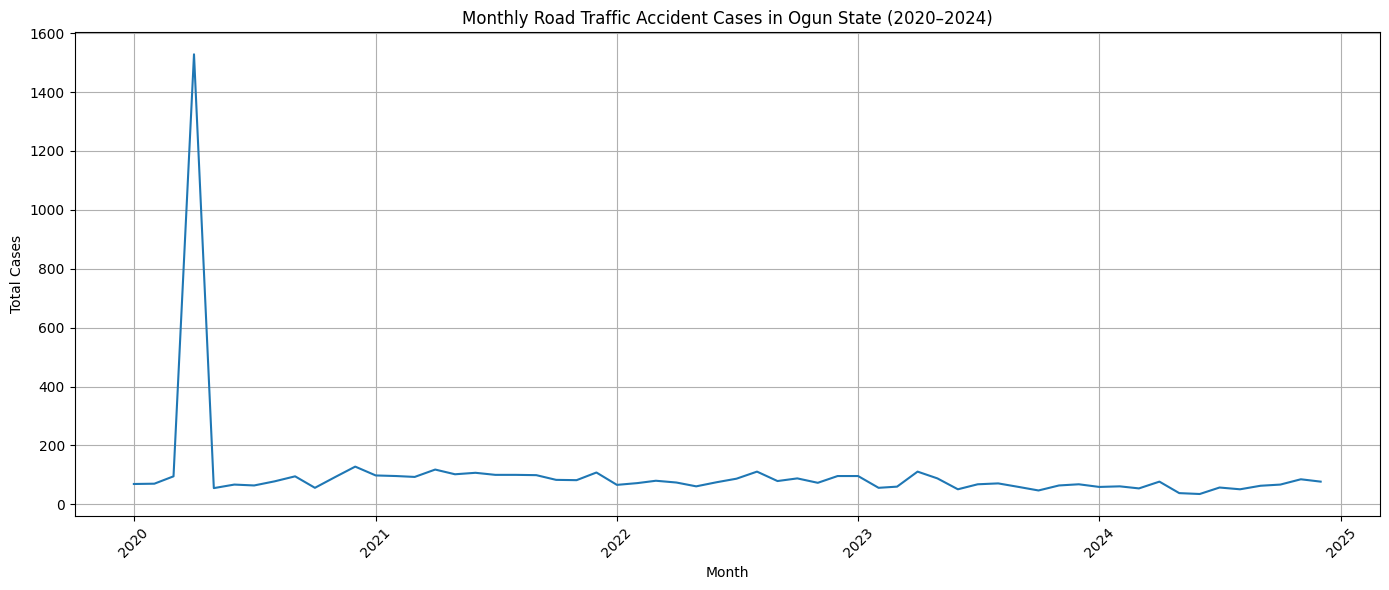

In [ ]:
# Plot original data
plt.figure(figsize=(14,6))
sns.lineplot(x=ts.index, y=ts.values)
plt.title("Monthly Road Traffic Accident Cases in Ogun State (2020–2024)")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("✅ Data is stationary")
else:
    print("❌ Data is not stationary — differencing may be needed")


ADF Statistic: -32.952471021455054
p-value: 0.0
✅ Data is stationary


In [ ]:
# Auto ARIMA to find best (p,d,q)
stepwise_model = auto_arima(ts, start_p=0, start_q=0,
                            max_p=5, max_q=5, m=12,
                            seasonal=False, trace=True,
                            error_action='ignore', suppress_warnings=True,
                            stepwise=True)
print(stepwise_model.summary())

/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/pyt

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=815.464, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=814.636, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=815.323, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=814.984, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=808.996, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=808.979, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=816.091, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=816.998, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 3.794 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -400.490
Date:                Sun, 22 Jun 2025   AIC                            808.979
Time:                        02:22:33   BIC                            817.357
Sample:                    01-01-2020   HQIC                           812.256
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9953      0.069     14.405      0.000       0.860      

In [ ]:
# Fit ARIMA
model = ARIMA(ts, order=stepwise_model.order)
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total_Cases   No. Observations:                   60
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -398.731
Date:                Sun, 22 Jun 2025   AIC                            807.461
Time:                        02:23:42   BIC                            817.933
Sample:                    01-01-2020   HQIC                           811.558
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9144    106.141      0.941      0.347    -108.119     307.948
ar.L1          0.9676      0.566      1.710      0.087      -0.142       2.077
ma.L1         -0.9999      1.325     -0.755      0.4

In [ ]:
# Fit ARIMA
model = ARIMA(ts, order=stepwise_model.order)
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total_Cases   No. Observations:                   60
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -398.731
Date:                Sun, 22 Jun 2025   AIC                            807.461
Time:                        02:23:42   BIC                            817.933
Sample:                    01-01-2020   HQIC                           811.558
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9144    106.141      0.941      0.347    -108.119     307.948
ar.L1          0.9676      0.566      1.710      0.087      -0.142       2.077
ma.L1         -0.9999      1.325     -0.755      0.4

/tmp/ipython-input-8-1598737434.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast.index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


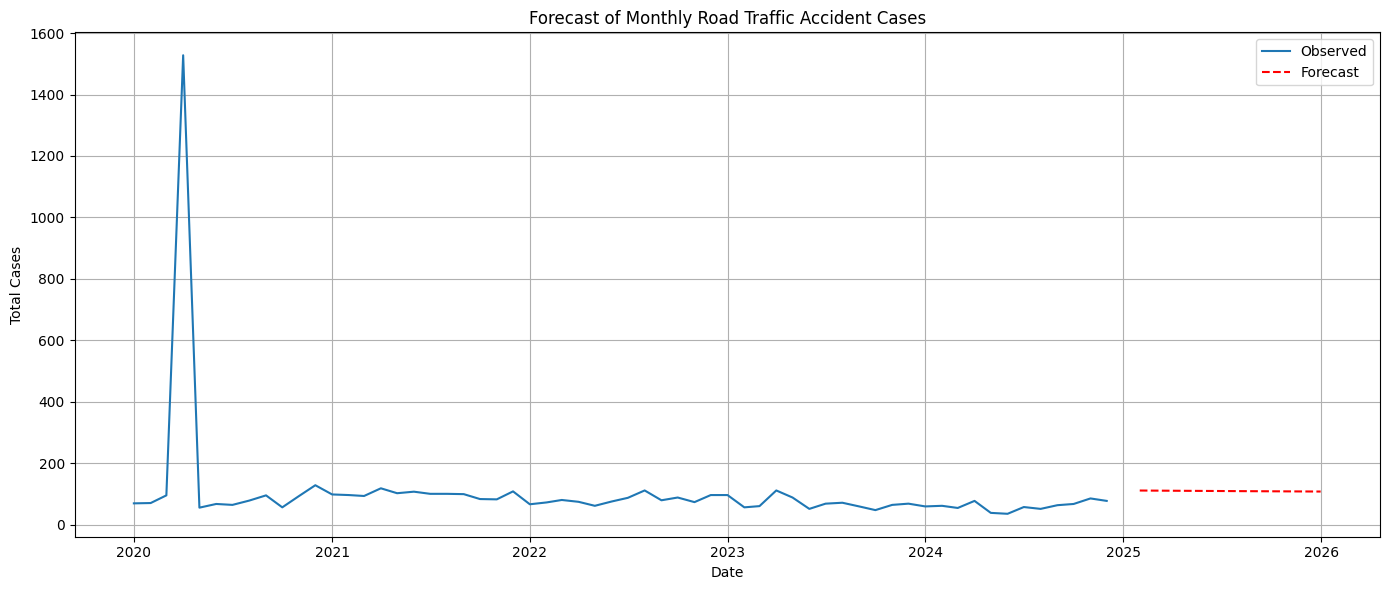

In [ ]:
# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast.index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Plot forecast
plt.figure(figsize=(14,6))
plt.plot(ts, label='Observed')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.title("Forecast of Monthly Road Traffic Accident Cases")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Causative Factor data
data_cf = [
    ("Jan, 20", 91), ("Feb, 20", 93), ("Mar, 20", 134), ("Apr, 20", 70), ("May, 20", 85),
    ("June, 20", 94), ("July, 20", 98), ("Aug, 20", 109), ("Sept, 20", 145), ("Oct, 20", 74),
    ("Nov, 20", 131), ("Dec, 20", 165), ("Jan, 21", 149), ("Feb, 21", 134), ("Mar, 21", 108),
    ("Apr, 21", 119), ("May, 21", 106), ("June, 21", 107), ("July, 21", 103), ("Aug, 21", 104),
    ("Sept, 21", 105), ("Oct, 21", 85), ("Nov, 21", 87), ("Dec, 21", 110), ("Jan, 22", 78),
    ("Feb, 22", 92), ("Mar, 22", 107), ("Apr, 22", 103), ("May, 22", 87), ("June, 22", 102),
    ("July, 22", 122), ("Aug, 22", 173), ("Sept, 22", 93), ("Oct, 22", 144), ("Nov, 22", 125),
    ("Dec, 22", 169), ("Jan, 23", 151), ("Feb, 23", 103), ("Mar, 23", 108), ("Apr, 23", 185),
    ("May, 23", 168), ("June, 23", 86), ("July, 23", 125), ("Aug, 23", 122), ("Sept, 23", 106),
    ("Oct, 23", 84), ("Nov, 23", 125), ("Dec, 23", 120), ("Jan, 24", 111), ("Feb, 24", 101),
    ("Mar, 24", 97), ("Apr, 24", 137), ("May, 24", 60), ("June, 24", 54), ("July, 24", 74),
    ("Aug, 24", 87), ("Sept, 24", 1), ("Oct, 24", 2), ("Nov, 24", 5), ("Dec, 24", 3)
]

# Fix year formats
data_cf_cleaned = [(month.replace(", 20", ", 2020").replace(", 21", ", 2021")
                    .replace(", 22", ", 2022").replace(", 23", ", 2023")
                    .replace(", 24", ", 2024"), value) for month, value in data_cf]

# Create DataFrame
df_cf = pd.DataFrame(data_cf_cleaned, columns=["Month", "Causative_Factor"])

# ✅ Correct handling of mixed month formats
df_cf["Month"] = pd.to_datetime(df_cf["Month"], format='mixed')
df_cf.set_index("Month", inplace=True)
ts_cf = df_cf["Causative_Factor"]


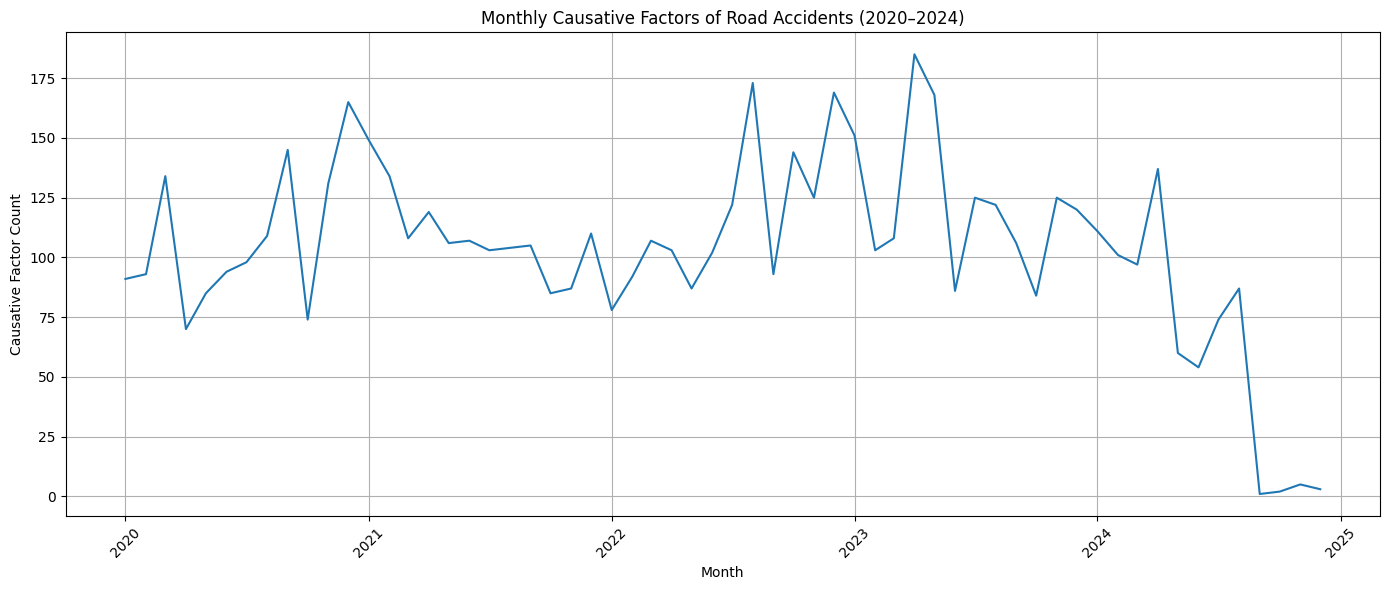

In [ ]:
# Plot time series
plt.figure(figsize=(14,6))
sns.lineplot(x=ts_cf.index, y=ts_cf.values)
plt.title("Monthly Causative Factors of Road Accidents (2020–2024)")
plt.xlabel("Month")
plt.ylabel("Causative Factor Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ADF test for stationarity
adf_result_cf = adfuller(ts_cf)
adf_result_cf_summary = {
    "ADF Statistic": adf_result_cf[0],
    "p-value": adf_result_cf[1],
    "Stationary": adf_result_cf[1] < 0.05
}



In [ ]:
# Auto ARIMA for causative factor data
stepwise_model_cf = auto_arima(ts_cf, start_p=0, start_q=0,
                                max_p=5, max_q=5,
                                seasonal=False, trace=False,
                                error_action='ignore', suppress_warnings=True,
                                stepwise=True)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


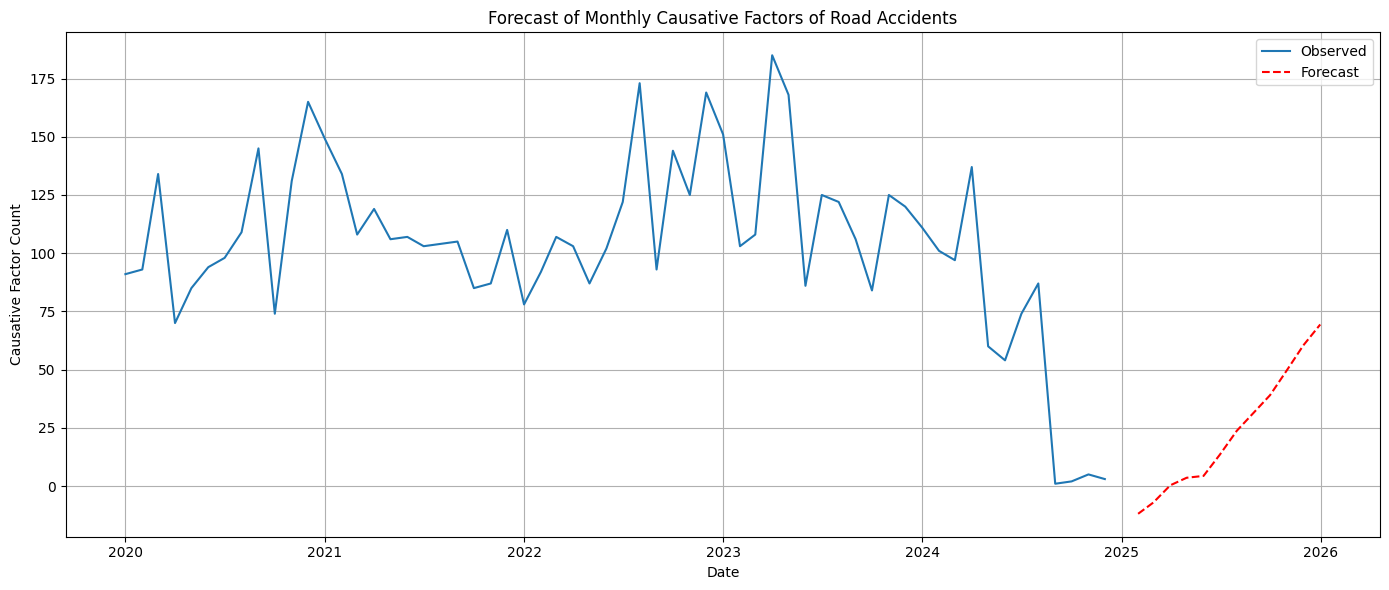

({'ADF Statistic': 0.8659274042760245,
  'p-value': 0.9926291632775645,
  'Stationary': False},
 (5, 0, 1),
 2025-01-31   -11.9
 2025-02-28    -7.1
 2025-03-31     0.3
 2025-04-30     3.6
 2025-05-31     4.4
 2025-06-30    13.5
 2025-07-31    23.7
 2025-08-31    31.5
 2025-09-30    39.0
 2025-10-31    49.8
 2025-11-30    60.4
 2025-12-31    69.4
 Freq: ME, Name: predicted_mean, dtype: float64)

In [ ]:
# Fit model
model_cf = ARIMA(ts_cf, order=stepwise_model_cf.order)
model_cf_fit = model_cf.fit()

# Forecast next 12 months
forecast_cf = model_cf_fit.forecast(steps=12)
forecast_cf.index = pd.date_range(start=ts_cf.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Plot forecast
plt.figure(figsize=(14,6))
plt.plot(ts_cf, label='Observed')
plt.plot(forecast_cf, label='Forecast', linestyle='--', color='red')
plt.title("Forecast of Monthly Causative Factors of Road Accidents")
plt.xlabel("Date")
plt.ylabel("Causative Factor Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return key outputs
adf_result_cf_summary, stepwise_model_cf.order, forecast_cf.round(1)

In [ ]:
# Fit ARIMA
model = ARIMA(ts, order=stepwise_model.order)
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total_Cases   No. Observations:                   60
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -398.731
Date:                Sun, 22 Jun 2025   AIC                            807.461
Time:                        02:23:42   BIC                            817.933
Sample:                    01-01-2020   HQIC                           811.558
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9144    106.141      0.941      0.347    -108.119     307.948
ar.L1          0.9676      0.566      1.710      0.087      -0.142       2.077
ma.L1         -0.9999      1.325     -0.755      0.4

In [ ]:
# Auto ARIMA for causative factor data
stepwise_model = auto_arima(ts, start_p=0, start_q=0,
                            max_p=5, max_q=5, m=12,
                            seasonal=True, trace=True,
                            error_action='ignore', suppress_warnings=True,
                            stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=653.624, Time=2.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=649.880, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=653.607, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=649.288, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=651.747, Time=0.06 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=651.693, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=651.741, Time=0.07 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=651.714, Time=0.15 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 4.104 seconds


In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(ts, marker='o')
plt.title("Monthly Total Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Full set of imports for your time series analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
!pip install pmdarima --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.8 MB/s eta 0:00:00


In [ ]:
# Full set of imports for your time series analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
!pip uninstall -y pmdarima
!pip install numpy --upgrade
!pip install pmdarima --no-binary :all: --force-reinstall


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.3/630.3 kB 12.3 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
^C


In [ ]:
# Full set of imports for your time series analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


ModuleNotFoundError: No module named 'pmdarima'

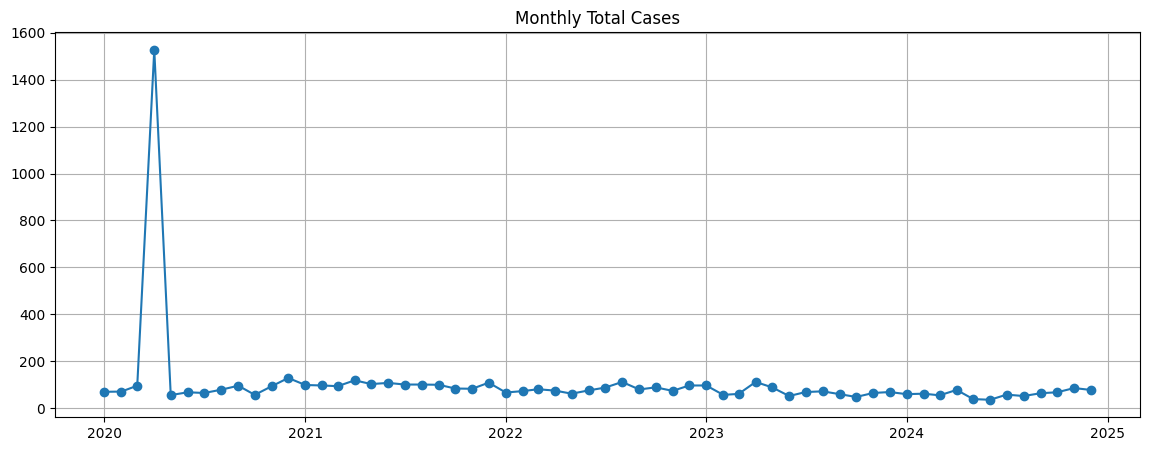

ADF Statistic: -32.95247102145506
p-value: 0.0
Series is stationary; no differencing needed.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total_Cases   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -394.806
Date:                Wed, 02 Jul 2025   AIC                            795.612
Time:                        12:19:20   BIC                            801.844
Sample:                    01-01-2020   HQIC                           798.045
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0012      0.087      0.014      0.989      -0.169       0.171
ma.L1         -0.9997     25.002     -0.040      0.968     -50.003      48.003
sigma2       3.55e+04   8.87e+05      0.040      0.9

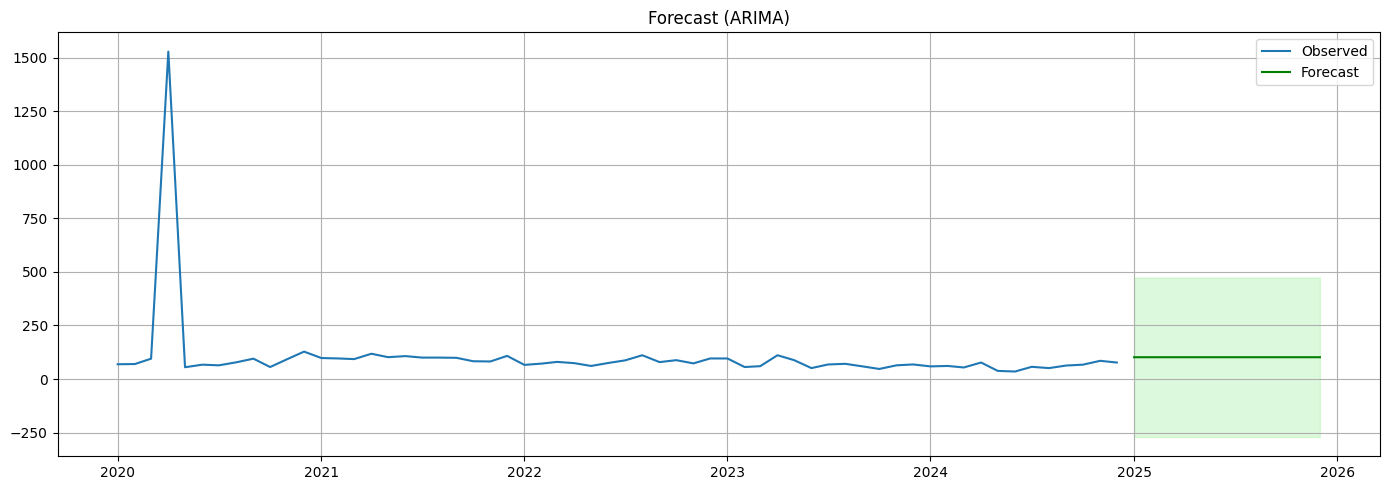

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Load data
data = [
    ("Jan, 2020", 69), ("Feb, 2020", 70), ("Mar, 2020", 95), ("Apr, 2020", 1528), ("May, 2020", 55),
    ("June, 2020", 67), ("July, 2020", 64), ("Aug, 2020", 78), ("Sept, 2020", 95), ("Oct, 2020", 56),
    ("Nov, 2020", 93), ("Dec, 2020", 128), ("Jan, 2021", 98), ("Feb, 2021", 96), ("Mar, 2021", 93),
    ("Apr, 2021", 118), ("May, 2021", 102), ("June, 2021", 107), ("July, 2021", 100), ("Aug, 2021", 100),
    ("Sept, 2021", 99), ("Oct, 2021", 83), ("Nov, 2021", 82), ("Dec, 2021", 108), ("Jan, 2022", 66),
    ("Feb, 2022", 72), ("Mar, 2022", 80), ("Apr, 2022", 74), ("May, 2022", 61), ("June, 2022", 75),
    ("July, 2022", 87), ("Aug, 2022", 111), ("Sept, 2022", 79), ("Oct, 2022", 88), ("Nov, 2022", 73),
    ("Dec, 2022", 96), ("Jan, 2023", 96), ("Feb, 2023", 56), ("Mar, 2023", 60), ("Apr, 2023", 111),
    ("May, 2023", 88), ("June, 2023", 51), ("July, 2023", 68), ("Aug, 2023", 71), ("Sept, 2023", 59),
    ("Oct, 2023", 47), ("Nov, 2023", 64), ("Dec, 2023", 68), ("Jan, 2024", 59), ("Feb, 2024", 61),
    ("Mar, 2024", 54), ("Apr, 2024", 77), ("May, 2024", 38), ("June, 2024", 35), ("July, 2024", 57),
    ("Aug, 2024", 51), ("Sept, 2024", 63), ("Oct, 2024", 67), ("Nov, 2024", 85), ("Dec, 2024", 77)
]
df = pd.DataFrame(data, columns=["Month", "Total_Cases"])
df["Month"] = pd.to_datetime(df["Month"], format="mixed")
df.set_index("Month", inplace=True)
ts = df["Total_Cases"]

# Step 3: Plot original series
plt.figure(figsize=(14, 5))
plt.plot(ts, marker='o')
plt.title("Monthly Total Cases")
plt.grid(True)
plt.show()

# Step 4: ADF test for stationarity
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Series is NOT stationary; differencing needed.")
else:
    print("Series is stationary; no differencing needed.")

# Step 5: Difference the series if not stationary
ts_diff = ts.diff().dropna()

# Step 6: Fit ARIMA model manually (adjust p,d,q as needed)
model = ARIMA(ts, order=(1,1,1))  # (p,d,q) — you may tune these
model_fit = model.fit()
print(model_fit.summary())

# Step 7: Forecast
forecast_steps = 12
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Step 8: Plot forecast
future_dates = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
forecast_series = pd.Series(forecast.values, index=future_dates)

plt.figure(figsize=(14, 5))
plt.plot(ts, label="Observed")
plt.plot(forecast_series, label="Forecast", color='green')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title("Forecast (ARIMA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

# Load the first CSV file (identified as imports based on content and context)
df_imports = pd.read_csv('Import and Export.xlsx - import_data_long_format.csv')

# Load the second CSV file (identified as exports based on content and context)
df_exports = pd.read_csv('Import and Export.xlsx - Sheet1.csv')

# --- Descriptive Analysis ---

# Calculate total import and export values per year
total_imports_per_year = df_imports.groupby('Period')['Value_in_Naira'].sum().reset_index()
total_exports_per_year = df_exports.groupby('Period')['Value_in_Naira'].sum().reset_index()

# Calculate mean and range for Total Imports
import_mean = total_imports_per_year['Value_in_Naira'].mean()
import_range = total_imports_per_year['Value_in_Naira'].max() - total_imports_per_year['Value_in_Naira'].min()

# Calculate percentage change for Total Imports
total_imports_per_year['Percentage_Change'] = total_imports_per_year['Value_in_Naira'].pct_change() * 100

# Calculate mean and range for Total Exports
export_mean = total_exports_per_year['Value_in_Naira'].mean()
export_range = total_exports_per_year['Value_in_Naira'].max() - total_exports_per_year['Value_in_Naira'].min()

# Calculate percentage change for Total Exports
total_exports_per_year['Percentage_Change'] = total_exports_per_year['Value_in_Naira'].pct_change() * 100

# Identify top import commodities for each year
# This part of the code prints the top 5 for each year, which was used for observation.
# for year in sorted(df_imports['Period'].unique()):
#     top_imports_year = df_imports[df_imports['Period'] == year].nlargest(5, 'Value_in_Naira')
#     print(f"\nTop 5 Imports in {year}:")
#     print(top_imports_year[['Commodity', 'Value_in_Naira']])

# Identify top export commodities for each year
# This part of the code prints the top 5 for each year, which was used for observation.
# for year in sorted(df_exports['Period'].unique()):
#     top_exports_year = df_exports[df_exports['Period'] == year].nlargest(5, 'Value_in_Naira')
#     print(f"\nTop 5 Exports in {year}:")
#     print(top_exports_year[['Commodity', 'Value_in_Naira']])


# --- Comparative Analysis Calculations ---

# Merge total imports and exports for trade balance and total trade volume
trade_summary = pd.merge(total_imports_per_year, total_exports_per_year, on='Period', suffixes=('_Imports', '_Exports'))

# Calculate Trade Balance (Exports - Imports)
trade_summary['Trade_Balance'] = trade_summary['Value_in_Naira_Exports'] - trade_summary['Value_in_Naira_Imports']

# Calculate Total Trade Volume (Imports + Exports)
trade_summary['Total_Trade_Volume'] = trade_summary['Value_in_Naira_Exports'] + trade_summary['Value_in_Naira_Imports']


# --- Time Series Analysis (Data Visualization) ---

# 1. Line graph of Total Import Value over time
chart_imports = alt.Chart(total_imports_per_year).mark_line(point=True).encode(
    x=alt.X('Period:O', title='Year'),
    y=alt.Y('Value_in_Naira:Q', title='Total Import Value (N Million)'),
    tooltip=['Period', alt.Tooltip('Value_in_Naira', format=',.2f')]
).properties(
    title='Total Import Value in Nigeria (2020-2023)'
)
chart_imports.save('total_import_value_line_chart.json')

# 2. Line graph of Total Export Value over time
chart_exports = alt.Chart(total_exports_per_year).mark_line(point=True).encode(
    x=alt.X('Period:O', title='Year'),
    y=alt.Y('Value_in_Naira:Q', title='Total Export Value (N Million)'),
    tooltip=['Period', alt.Tooltip('Value_in_Naira', format=',.2f')]
).properties(
    title='Total Export Value in Nigeria (2020-2023)'
)
chart_exports.save('total_export_value_line_chart.json')

# 3. Line graph of Trade Balance over time
chart_trade_balance = alt.Chart(trade_summary).mark_line(point=True).encode(
    x=alt.X('Period:O', title='Year'),
    y=alt.Y('Trade_Balance:Q', title='Trade Balance (N Million)'),
    tooltip=['Period', alt.Tooltip('Trade_Balance', format=',.2f')]
).properties(
    title='Nigeria Trade Balance (Exports - Imports) (2020-2023)'
)
chart_trade_balance.save('trade_balance_line_chart.json')

# 4. Line graph of Total Trade Volume over time
chart_total_trade_volume = alt.Chart(trade_summary).mark_line(point=True).encode(
    x=alt.X('Period:O', title='Year'),
    y=alt.Y('Total_Trade_Volume:Q', title='Total Trade Volume (N Million)'),
    tooltip=['Period', alt.Tooltip('Total_Trade_Volume', format=',.2f')]
).properties(
    title='Nigeria Total Trade Volume (Imports + Exports) (2020-2023)'
)
chart_total_trade_volume.save('total_trade_volume_line_chart.json')

# Get the top 5 import commodities overall for the multi-line plot
top_5_imports_overall = df_imports.groupby('Commodity')['Value_in_Naira'].sum().nlargest(5).index.tolist()
df_top_imports_trends = df_imports[df_imports['Commodity'].isin(top_5_imports_overall)]

# 5. Line graph showing the trend of the top 5 import commodities over the years
chart_top_imports_trends = alt.Chart(df_top_imports_trends).mark_line(point=True).encode(
    x=alt.X('Period:O', title='Year'),
    y=alt.Y('Value_in_Naira:Q', title='Import Value (N Million)'),
    color='Commodity:N',
    tooltip=['Period', 'Commodity', alt.Tooltip('Value_in_Naira', format=',.2f')]
).properties(
    title='Trends of Top 5 Import Commodities in Nigeria (2020-2023)'
)
chart_top_imports_trends.save('top_5_imports_trends_line_chart.json')


# Get the top 5 export commodities overall for the multi-line plot
top_5_exports_overall = df_exports.groupby('Commodity')['Value_in_Naira'].sum().nlargest(5).index.tolist()
df_top_exports_trends = df_exports[df_exports['Commodity'].isin(top_5_exports_overall)]

# 6. Line graph showing the trend of the top 5 export commodities over the years
chart_top_exports_trends = alt.Chart(df_top_exports_trends).mark_line(point=True).encode(
    x=alt.X('Period:O', title='Year'),
    y=alt.Y('Value_in_Naira:Q', title='Export Value (N Million)'),
    color='Commodity:N',
    tooltip=['Period', 'Commodity', alt.Tooltip('Value_in_Naira', format=',.2f')]
).properties(
    title='Trends of Top 5 Export Commodities in Nigeria (2020-2023)'
)
chart_top_exports_trends.save('top_5_exports_trends_line_chart.json')


FileNotFoundError: [Errno 2] No such file or directory: 'Import and Export.xlsx - import_data_long_format.csv'

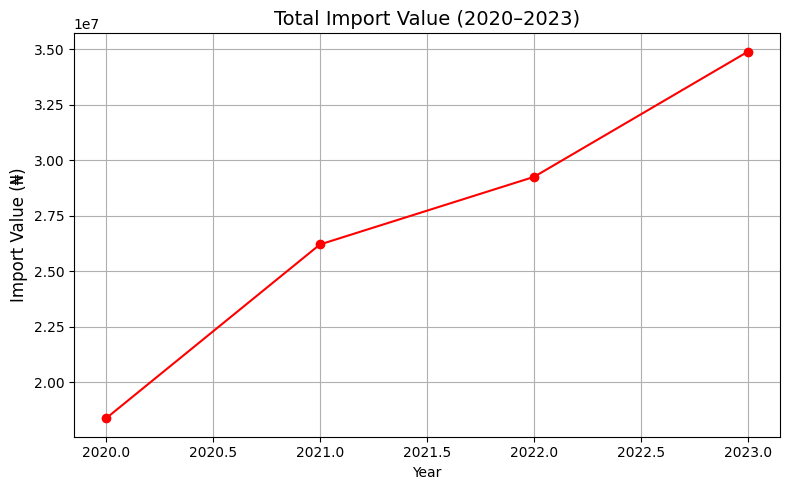

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import totals per year
import_data = {
    'Year': [2020, 2021, 2022, 2023],
    'Import_Value': [
        18368912.99,  # Sum of all 2020 import values
        26208484.98,  # Sum of all 2021 import values
        29253681.76,  # Sum of all 2022 import values
        34898486.28   # Sum of all 2023 import values
    ]
}

df_import = pd.DataFrame(import_data)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_import['Year'], df_import['Import_Value'], marker='o', linestyle='-', color='red')
plt.title('Total Import Value (2020–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Import Value (₦)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


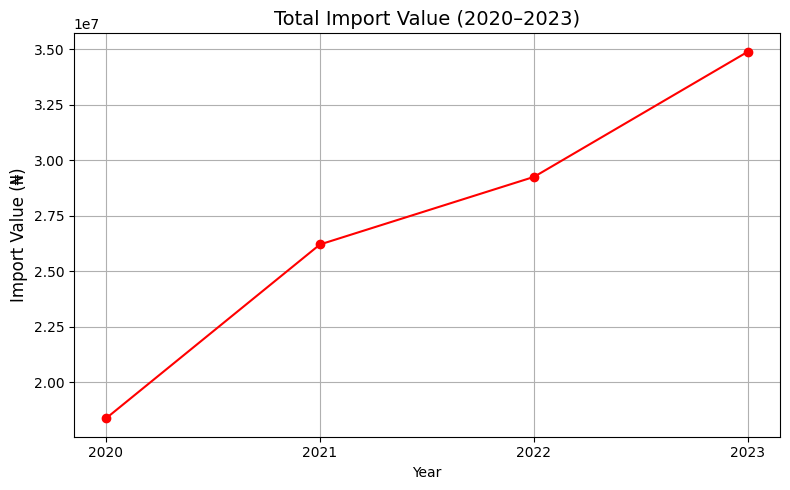

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import totals per year
import_data = {
    'Year': [2020, 2021, 2022, 2023],
    'Import_Value': [
        18368912.99,  # 2020
        26208484.98,  # 2021
        29253681.76,  # 2022
        34898486.28   # 2023
    ]
}

df_import = pd.DataFrame(import_data)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_import['Year'], df_import['Import_Value'], marker='o', linestyle='-', color='red')
plt.title('Total Import Value (2020–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Import Value (₦)', fontsize=12)
plt.xticks([2020, 2021, 2022, 2023])  # Force x-axis to show only these ticks
plt.grid(True)
plt.tight_layout()
plt.show()
